<a href="https://colab.research.google.com/github/kadammayuresh008/facemaskdetection/blob/main/Regulariztion%26EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Download Dataset**

First, we download the Face Mask Detection dataset from Google Drive and unzip the downloaded dataset.zip into the data folder.

Mounting google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Changing current directory to **"/content/drive/MyDrive/AML"** 

Unzipping the archive zip file

In [ ]:
import os
os.chdir('/content/drive/MyDrive/AML')
# !unzip -q archive.zip

### **Import Libraries**

Importing necessary libraries and modules required to build the classification model.

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import plot_model
from tensorflow import keras

### **Load Dataset**

Loading the dataset

In [ ]:
Dataset="./data"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['with_mask', 'without_mask']


We use the function convert_image_to_array to resize an image to the size DEFAULT_IMAGE_SIZE we defined below.
 
Then converting the .jpg image to array format that can be used for further processing.

In [ ]:
def convert_image_to_array(image_dir):
    DEFAULT_IMAGE_SIZE = tuple((112, 112))
    img_rows=112
    img_cols=112
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE) 
            grayscale_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            images1=np.array(resized_img)/255.0
            images1=np.reshape(images1,(1,img_rows,img_cols,1)) 
            return images1
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


In [ ]:
images=[]
labels=[]
img_rows=112
img_cols=112
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        
        try:
            #concerting image to grayscale
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            
            #resizing the gray scaled images into 56x56 to keep size of the image consistent
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception: ',e)
            
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

In [ ]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)

### **Split Dataset**
Splitting the data into training and test sets.

In [ ]:
(train_X,test_X,train_y,test_y)=train_test_split(images,labels,test_size=0.25,random_state=0)

### **Build Model**

Defining the hyperparameters of the face mask detection model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers

In [ ]:
num_classes=2
batch_size=32

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(l=0.01),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

### **Model Summary**

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)            

### **Train Model**
We initialize Adam optimizer with learning rate and decay parameters.

Also, we choose the type of loss and metrics for the model and compile it for training.


In [ ]:
from keras.optimizers import Adam

epoch=25
# Compile model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

In [ ]:
fitted_model=model.fit(
train_X,
train_y,   
epochs=epoch,
validation_split=0.25)

Epoch 1/25
133/133 [==============================] - 163s 1s/step - loss: 1.1298 - accuracy: 0.6023 - val_loss: 0.6157 - val_accuracy: 0.7691
Epoch 2/25
133/133 [==============================] - 162s 1s/step - loss: 0.5707 - accuracy: 0.7772 - val_loss: 0.4820 - val_accuracy: 0.8114
Epoch 3/25
133/133 [==============================] - 162s 1s/step - loss: 0.4327 - accuracy: 0.8386 - val_loss: 0.4254 - val_accuracy: 0.8326
Epoch 4/25
133/133 [==============================] - 162s 1s/step - loss: 0.3467 - accuracy: 0.8735 - val_loss: 0.3757 - val_accuracy: 0.8630
Epoch 5/25
133/133 [==============================] - 163s 1s/step - loss: 0.3164 - accuracy: 0.8889 - val_loss: 0.3651 - val_accuracy: 0.8616
Epoch 6/25
133/133 [==============================] - 163s 1s/step - loss: 0.2572 - accuracy: 0.9174 - val_loss: 0.3864 - val_accuracy: 0.8545
Epoch 7/25
133/133 [==============================] - 163s 1s/step - loss: 0.2337 - accuracy: 0.9325 - val_loss: 0.3848 - val_accuracy: 0.8595

### **Save Model**

In [ ]:
model.save('bettermodel.h5')

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/AML/fm.h5")

### **Evaluate Model**
Comparing the accuracy and loss by plotting the graph for training and validation.

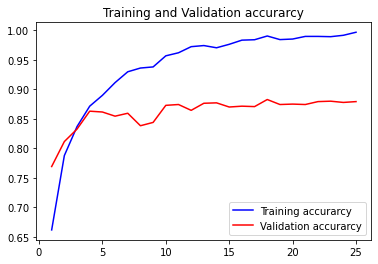

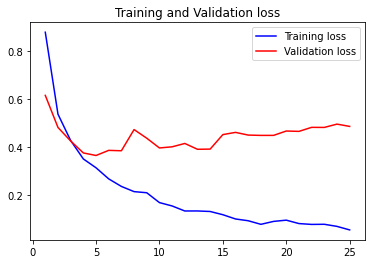

In [ ]:
acc = fitted_model.history['accuracy']
val_acc = fitted_model.history['val_accuracy']
loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Evaluating model accuracy by using the evaluate method

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
60/60 [==============================] - 18s 296ms/step - loss: 0.5522 - accuracy: 0.8735
Test Accuracy: 87.34780550003052


### **Test Model**

We write the following predict_mask function to predict the 
 <!-- image. -->

We just need to provide the complete path to the image and it displays the image along with its prediction 
<!-- class or plant disease. -->

In [ ]:
def predict_mask(image_path):
    image_array = convert_image_to_array(image_path)
    plt.imshow(plt.imread(image_path))
    result = model.predict(image_array)
    imageclass = model.predict_classes(image_array)
    # result = model.predict(np_image)
    if imageclass[0]==1:
      imagelabel="No Mask"
    elif imageclass[0]==0 :
      imagelabel="Mask"
    else :
      imagelabel="Cannot be identified"
    plt.title(imagelabel,fontsize= 30)


For testing purposes, we randomly choose images from the dataset and try predicting the images as with mask or without mask.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


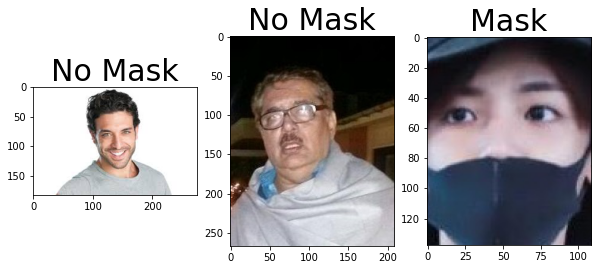

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/without_mask/without_mask_1000.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_900.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_370.jpg")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


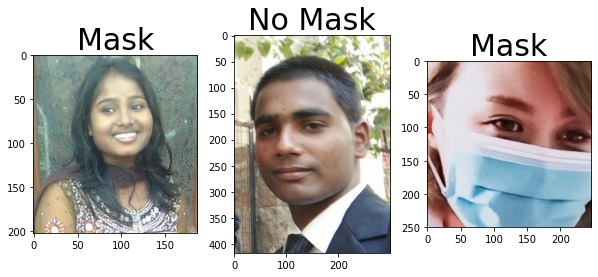

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/without_mask/without_mask_970.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_609.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_320.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


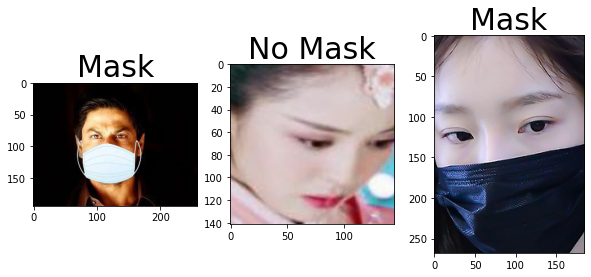

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/with_mask/with_mask_940.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_780.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_80.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


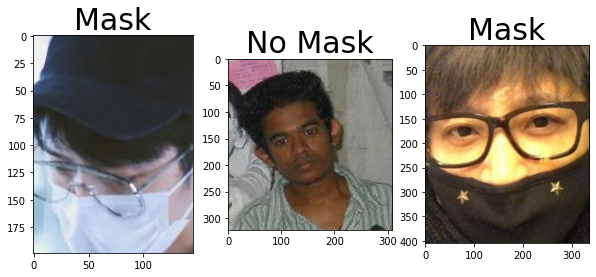

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/with_mask/with_mask_308.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_620.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_360.jpg")

## **Conclusion**


We found the training accuracy to be 99% and test accuracy to be 87.2%.  The training loss was found to be 0.0058 and the test loss to be 0.55. 
We may be able to reduce overfitting in the model to some extent. But the problem of overfitting still exists
